<a href="https://colab.research.google.com/github/brucruz/quant-journey-with-python/blob/main/BTC_Fetching_and_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Instalação e importação de bibliotecas

In [2]:
!pip install python-binance
!pip install plotly

     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 103 kB 57.6 MB/s 
     |████████████████████████████████| 1.1 MB 51.9 MB/s 
     |████████████████████████████████| 288 kB 53.4 MB/s 
     |████████████████████████████████| 271 kB 40.2 MB/s 
     |████████████████████████████████| 144 kB 55.9 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 


In [3]:
import pandas as pd
from binance.client import Client
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
client = Client()

In [5]:
btcbrl = client.get_historical_klines(symbol = "BTCBRL", start_str = "2021-01-01", end_str = "2022-02-08", interval = client.KLINE_INTERVAL_1DAY)

In [6]:
type(btcbrl)

list

In [7]:
btc_brl = pd.DataFrame(btcbrl)

In [8]:
# Renomear as colunas
btc_brl.rename(columns = { 0: 'date', 1: 'open', 2: 'high', 3: 'low', 4: 'close' }, inplace = True)

# Configurar o índice do dataframe como sendo a data
btc_brl.set_index('date', inplace=True)

# Mudar o formato da data para padrão
btc_brl.index = pd.to_datetime(btc_brl.index, unit = 'ms')

# Dropar todas as colunas do 4 para frente
btc_brl = btc_brl.drop(btc_brl.columns[4:], axis = 1)

In [9]:
btc_brl.head()

,open,high,low,close
date,,,,
2021-01-01,152056.00000000,154167.00000000,150911.00000000,153480.00000000
2021-01-02,153478.00000000,173900.00000000,152171.00000000,168784.00000000
2021-01-03,168885.00000000,180925.00000000,167897.00000000,173503.00000000
2021-01-04,173504.00000000,175981.00000000,150000.00000000,169820.00000000
2021-01-05,169825.00000000,182966.00000000,159769.00000000,179972.00000000


In [10]:
btc_brl.dtypes

open     object
high     object
low      object
close    object
dtype: object

In [11]:
btc_brl['open'] = pd.to_numeric(btc_brl['open'])
btc_brl['high'] = pd.to_numeric(btc_brl['high'])
btc_brl['low'] = pd.to_numeric(btc_brl['low'])
btc_brl['close'] = pd.to_numeric(btc_brl['close'])

2. Análise Quantitativa

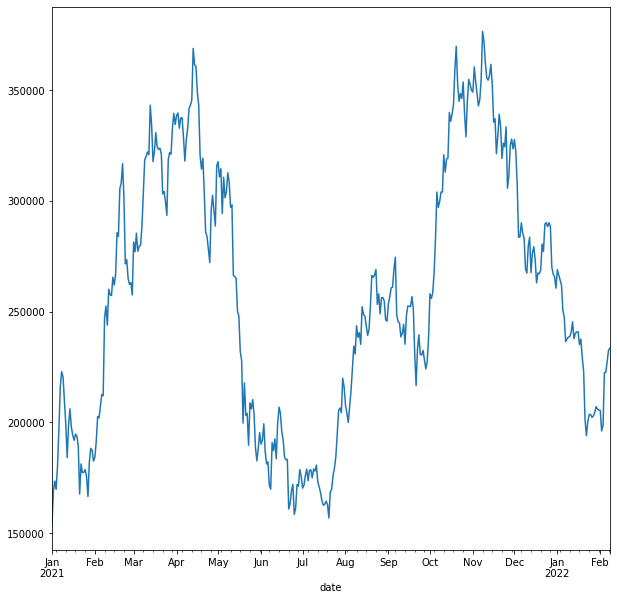

In [12]:
btc_brl.close.plot(figsize = (10,10));

In [13]:
btc_brl['daily_return'] = btc_brl.close.pct_change()

In [14]:
btc_brl.head()

,open,high,low,close,daily_return
date,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781


In [15]:
btc_brl.daily_return.describe()

count    403.000000
mean       0.001815
std        0.039452
min       -0.124411
25%       -0.019981
50%        0.000319
75%        0.021763
max        0.165940
Name: daily_return, dtype: float64

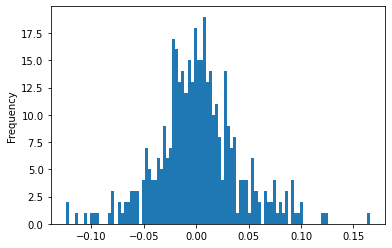

In [16]:
# Distribuição de retornos
btc_brl.daily_return.plot.hist(bins = 100);

In [17]:
# Janela de volatilidade de 30 dias
vol_30 = btc_brl.daily_return.rolling(window = 30).std()

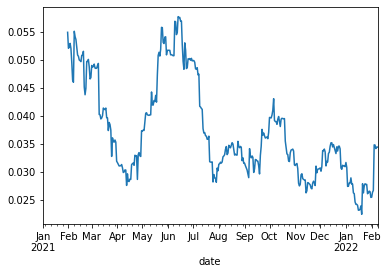

In [18]:
vol_30.plot()

In [19]:
# Drawdown em janela de 30 dias
# Perda máxima em um determinado período - distância entre ganho máximo e a mínima (fundo do poço em um período)

dd_30 = btc_brl.daily_return.rolling(window = 30).min()

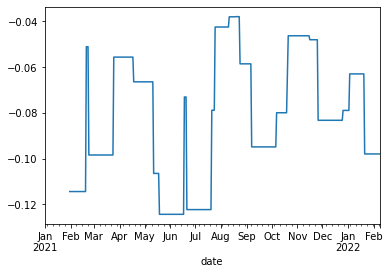

In [20]:
dd_30.plot()

3. Criação dos sinais do trading e backtesting

In [21]:
# 3.1

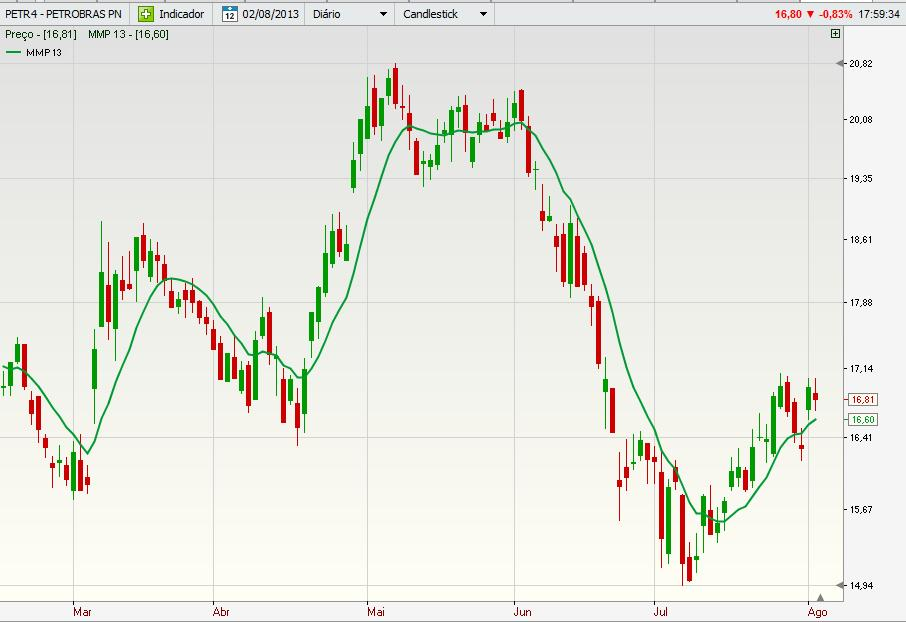

In [22]:
import IPython
url = 'https://i1.wp.com/escolatrader.net/wp-content/uploads/2013/08/petr4pond.jpg'
IPython.display.Image(url, width = 500)

In [23]:
# Lembrete procure parametrizar tudo o que você faz

## Variação mínima do preço || Ações = R$0.01 || WINFUT = 5pts || INDFUT = 1pt

tick_min = 1 # variação mínima para ações no preço
MM_periodo = 9

In [24]:
## 3.2 Construção do sinal de COMPRA

In [25]:
### Regra 1: Preço Fech > MM

In [26]:
## Cáculo Média Móvel de 9 períodos
MMA = btc_brl.close.rolling(window=MM_periodo).mean()

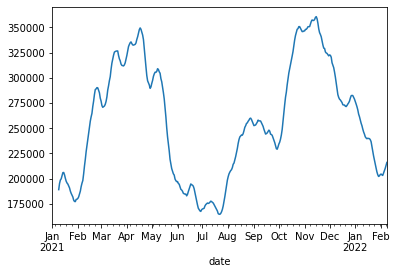

In [27]:
MMA.plot();

In [28]:
btc_brl['MMA'] = MMA
btc_brl.head(20)

,open,high,low,close,daily_return,MMA
date,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111


In [29]:
## GRÁFICO MÉDIA MÓVEL

# cria figura
fig = make_subplots(rows = 1, cols = 1)

# Adiciona o gráfico de candlestick com os parâmetros OHLC no eixo y e no eixo x o index com as datas
fig.add_trace(go.Candlestick(name = 'Bitcoin_BRL', x = btc_brl.index, open = btc_brl.open, high = btc_brl.high, low = btc_brl.low, close = btc_brl.close, showlegend = True), row = 1, col = 1)

# Cria o gráfico de MMA com o mesmo racional de eixo de cima
fig.add_trace(go.Scatter(name = 'MMA_9p', x = btc_brl.index, y = btc_brl.MMA, marker_color = 'blue'), row = 1, col = 1)

# Personalizar o eixo Y
fig.update_yaxes(title_text = '<b> Preço Bitcoin (R$)', row = 1, col = 1)

# Personalizar aspectos da figura em geral
fig.update_layout(xaxis_rangeslider_visible = False, width = 1000, height = 500)

# Mostra a figura
fig.show()

In [38]:
Regra1 = btc_brl['close'] > btc_brl['MMA']
btc_brl['Regra1'] = Regra1
btc_brl.head(20)

,open,high,low,close,daily_return,MMA,Regra2,Regra1
date,,,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN,False,False
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN,False,False
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN,False,False
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN,False,False
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN,False,False
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN,False,False
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN,False,False
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN,False,False
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111,False,True


In [30]:
### Regra 2: Preço candle anterior < MMA9p

In [39]:
Regra1_cd_anterior = btc_brl.close.shift(1) < btc_brl.MMA.shift(1)
btc_brl['Regra2'] = Regra1_cd_anterior
btc_brl.head(50)

,open,high,low,close,daily_return,MMA,Regra2,Regra1
date,,,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN,False,False
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN,False,False
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN,False,False
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN,False,False
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN,False,False
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN,False,False
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN,False,False
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN,False,False
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111,False,True


In [42]:
sinal_compra = (btc_brl.Regra1 == True) & (btc_brl.Regra2 == True);
btc_brl['sinal_compra'] = sinal_compra
btc_brl.head(20)

,open,high,low,close,daily_return,MMA,Regra2,Regra1,sinal_compra
date,,,,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN,False,False,False
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN,False,False,False
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN,False,False,False
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN,False,False,False
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN,False,False,False
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN,False,False,False
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN,False,False,False
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN,False,False,False
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111,False,True,False


In [45]:
sinal_compra_df = btc_brl[btc_brl.sinal_compra == True]
sinal_compra_df

,open,high,low,close,daily_return,MMA,Regra2,Regra1,sinal_compra
date,,,,,,,,,
2021-01-14,198827.0,211899.0,196299.0,206134.0,0.036792,205948.444444,True,True,True
2021-01-28,166425.0,184200.0,164285.0,182044.0,0.092918,177326.777778,True,True,True
2021-03-01,257538.0,282000.0,256447.0,281400.0,0.092599,276927.666667,True,True,True
2021-03-17,322222.0,331244.0,309832.0,330772.0,0.026203,325498.666667,True,True,True
2021-03-26,293860.0,318604.0,293200.0,318579.0,0.085681,312372.222222,True,True,True
2021-04-10,332461.0,346671.0,332125.0,341636.0,0.027634,332832.888889,True,True,True
2021-04-27,295796.0,304889.0,291617.0,302507.0,0.022688,295090.666667,True,True,True
2021-04-30,288682.0,316913.0,286005.0,315831.0,0.094208,290947.111111,True,True,True
2021-05-05,294000.0,314452.0,292892.0,310649.0,0.055556,305597.777778,True,True,True


In [47]:
n_sinal_compra_df = len(sinal_compra_df)
n_sinal_compra_df

37

In [50]:
## GRÁFICO QUE DEMONSTRA AS ENTRADAS DA ESTRATÉGIA

fig = make_subplots(rows=1, cols=2)

## Figura 1
data_range_btc_df = pd.date_range(start='2021-02-26',end='2021-03-31')
btc_brl_index_range = btc_brl[btc_brl.index.isin(data_range_btc_df)]
btc_brl_index_range

fig.add_trace(go.Candlestick(name='Bitcoin_BRL', x=btc_brl_index_range.index, open=btc_brl_index_range['open'], high = btc_brl_index_range['high'], low=btc_brl_index_range['low'], close=btc_brl_index_range['close']), row=1,col=1)
fig.update_yaxes(title_text="<b> Preço Bitcoin (R$)",row=1, col=1)
fig.add_trace(go.Scatter(name='MMA_9p', x=btc_brl_index_range.index, y=btc_brl_index_range.MMA, marker_color='blue'),row=1,col=1)
fig.add_vrect(x0='2021-02-26 12:00', x1='2021-03-07 15:00', fillcolor="green", opacity=0.25, line_width=0,row=1, col=1)
fig.add_trace(go.Scatter(x=['2021-03-03'],y=[320000],mode="text",text="<b>Zoom",textposition="top center",showlegend=False),row=1, col=1)

## Figura 2
data_range_btc_df = pd.date_range(start='2021-02-27',end='2021-03-07')
btc_df_index_range = btc_brl[btc_brl.index.isin(data_range_btc_df)]
btc_df_index_range

fig.add_trace(go.Candlestick(name='Bitcoin_BRL', x=btc_df_index_range.index, open=btc_df_index_range['open'], high = btc_df_index_range['high'], low=btc_df_index_range['low'], close=btc_df_index_range['close'],showlegend=False), row=1,col=2)
fig.update_yaxes(title_text="<b> Preço Bitcoin (R$)", row=1, col=2)
fig.add_annotation(x='2021-03-01',y=265000, xref="x",yref="y",text="<b>Candle_Sinalizador",showarrow=True,font=dict(family="Arial",size=12,color="black"),align="center",arrowhead=2,
                   arrowsize=1,arrowwidth=2,arrowcolor="black",row=1, col=2)
fig.add_trace(go.Scatter(name='MMA_9p', x=btc_df_index_range.index, y=btc_df_index_range.MMA, marker_color='blue',showlegend=False),row=1,col=2)

## Geral
fig.update_layout(xaxis_rangeslider_visible=False,xaxis2_rangeslider_visible=False,legend=dict(orientation="h",xanchor="right",x=1,yanchor="bottom",y=1.1),title_text='Sinal Compra Cruzamento Preço/Média' ,width=1000 ,height=500)

fig.show()

In [48]:
# o ideal seria usar ordem a limite, mas usaremos ordem a mercado
ordem_compra_merc = btc_brl.open.shift(-1)
btc_brl['ordem_compra_merc'] = ordem_compra_merc
btc_brl.head(15)

,open,high,low,close,daily_return,MMA,Regra2,Regra1,sinal_compra,ordem_compra_merc
date,,,,,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN,False,False,False,153478.0
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN,False,False,False,168885.0
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN,False,False,False,173504.0
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN,False,False,False,169825.0
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN,False,False,False,179990.0
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN,False,False,False,196752.0
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN,False,False,False,216160.0
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN,False,False,False,223113.0
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111,False,True,False,220504.0


In [52]:
# Regra de Stop Móvel onde o fechamento anterior é menor que a média móvel anterior
btc_brl['Trading_Stop'] = btc_brl.close.shift(-1) < btc_brl.MMA.shift(-1)
btc_brl.head(50)

,open,high,low,close,daily_return,MMA,Regra2,Regra1,sinal_compra,ordem_compra_merc,Trading_Stop
date,,,,,,,,,,,
2021-01-01,152056.0,154167.0,150911.0,153480.0,NaN,NaN,False,False,False,153478.0,False
2021-01-02,153478.0,173900.0,152171.0,168784.0,0.099713,NaN,False,False,False,168885.0,False
2021-01-03,168885.0,180925.0,167897.0,173503.0,0.027959,NaN,False,False,False,173504.0,False
2021-01-04,173504.0,175981.0,150000.0,169820.0,-0.021227,NaN,False,False,False,169825.0,False
2021-01-05,169825.0,182966.0,159769.0,179972.0,0.059781,NaN,False,False,False,179990.0,False
2021-01-06,179990.0,197555.0,177210.0,196635.0,0.092587,NaN,False,False,False,196752.0,False
2021-01-07,196752.0,222813.0,194600.0,215874.0,0.097841,NaN,False,False,False,216160.0,False
2021-01-08,216160.0,228045.0,200150.0,222915.0,0.032616,NaN,False,False,False,223113.0,False
2021-01-09,223113.0,225333.0,213593.0,220612.0,-0.010331,189066.111111,False,True,False,220504.0,False


In [58]:
# Primeiro criar a lista de preços de compra

list_preco_compra = []

for i in range(13, len(btc_brl)):
  if (btc_brl['close'].iloc[i] > btc_brl['MMA'].iloc[i]) and (btc_brl['close'].iloc[i-1] < btc_brl['MMA'].iloc[i-1]):
    preco_compra = btc_brl['open'].iloc[i+1]
    list_preco_compra.append(preco_compra)
  else:
    pass

In [59]:
len(list_preco_compra)

37

In [60]:
# Criar a lista de preços de venda

list_preco_venda = []

for i in range(13, len(btc_brl)):
  if (btc_brl['close'].iloc[i] < btc_brl['MMA'].iloc[i]) and (btc_brl['close'].iloc[i-1] > btc_brl['MMA'].iloc[i-1]):
    preco_venda = btc_brl['open'].iloc[i+1]
    list_preco_venda.append(preco_venda)
  else:
    pass

In [61]:
len(list_preco_venda)

36

In [63]:
list_preco_venda.append('nao_fechou_ainda')

In [67]:
df_list_preco_compra = pd.DataFrame(list_preco_compra, columns = ['Preco_Compra'])
df_list_preco_venda = pd.DataFrame(list_preco_venda, columns = ['Preco_Venda'])
df_list_resultado = pd.concat([df_list_preco_compra, df_list_preco_venda], axis = 1)
df_list_resultado.head()

,Preco_Compra,Preco_Venda
0,205900.0,197757.0
1,182181.0,271544.0
2,281490.0,317383.0
3,330772.0,324342.0
4,318575.0,328655.0


In [69]:
df_list_resultado['Preco_Venda'].iloc[36]
btc_brl['close'].iloc[-1]

233556.0

In [70]:
df_list_resultado['Preco_Venda'].iloc[36] = btc_brl.close.iloc[-1]
df_list_resultado

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Preco_Compra,Preco_Venda
0,205900.0,197757.0
1,182181.0,271544.0
2,281490.0,317383.0
3,330772.0,324342.0
4,318575.0,328655.0
5,341921.0,343312.0
6,302506.0,288682.0
7,315934.0,294000.0
8,310650.0,301380.0
9,312645.0,297094.0


In [72]:
# Subtrair o preço de venda do preço de compra

df_list_resultado['Resultado'] = df_list_resultado['Preco_Venda'] - df_list_resultado['Preco_Compra']
df_list_resultado

,Preco_Compra,Preco_Venda,Resultado
0,205900.0,197757.0,-8143.0
1,182181.0,271544.0,89363.0
2,281490.0,317383.0,35893.0
3,330772.0,324342.0,-6430.0
4,318575.0,328655.0,10080.0
5,341921.0,343312.0,1391.0
6,302506.0,288682.0,-13824.0
7,315934.0,294000.0,-21934.0
8,310650.0,301380.0,-9270.0
9,312645.0,297094.0,-15551.0


In [73]:
df_list_resultado['Resultado_%'] = ((df_list_resultado['Preco_Venda'] - df_list_resultado['Preco_Compra']) / df_list_resultado['Preco_Compra'])
df_list_resultado

,Preco_Compra,Preco_Venda,Resultado,Resultado_%
0,205900.0,197757.0,-8143.0,-0.039548
1,182181.0,271544.0,89363.0,0.490518
2,281490.0,317383.0,35893.0,0.127511
3,330772.0,324342.0,-6430.0,-0.019439
4,318575.0,328655.0,10080.0,0.031641
5,341921.0,343312.0,1391.0,0.004068
6,302506.0,288682.0,-13824.0,-0.045698
7,315934.0,294000.0,-21934.0,-0.069426
8,310650.0,301380.0,-9270.0,-0.029841
9,312645.0,297094.0,-15551.0,-0.04974


In [75]:
# Calcular a evolução do patrimônio

caixa_inicial = 500000

df_list_resultado['Evolucao_Patrimonio'] = df_list_resultado['Resultado'].cumsum() + caixa_inicial

df_list_resultado

,Preco_Compra,Preco_Venda,Resultado,Resultado_%,Evolucao_Patrimonio
0,205900.0,197757.0,-8143.0,-0.039548,491857.0
1,182181.0,271544.0,89363.0,0.490518,581220.0
2,281490.0,317383.0,35893.0,0.127511,617113.0
3,330772.0,324342.0,-6430.0,-0.019439,610683.0
4,318575.0,328655.0,10080.0,0.031641,620763.0
5,341921.0,343312.0,1391.0,0.004068,622154.0
6,302506.0,288682.0,-13824.0,-0.045698,608330.0
7,315934.0,294000.0,-21934.0,-0.069426,586396.0
8,310650.0,301380.0,-9270.0,-0.029841,577126.0
9,312645.0,297094.0,-15551.0,-0.04974,561575.0


In [76]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(go.Scatter(x=df_list_resultado.index, y=df_list_resultado['Evolucao_Patrimonio'], name='Evolução Patrimônio'), row=1, col=1)
fig.add_trace(go.Bar(x=df_list_resultado.index, y=df_list_resultado['Resultado'], name='PnL'), row=2, col=1)
fig.update_yaxes(title_text="<b> Valor Caixa (R$)", row=1, col=1)
fig.update_yaxes(title_text="<b> PnL Ops (R$)", row=2, col=1)
fig.update_layout(title_text='Evolução do Patrimônio e PnL', width=1000, height=800)
fig.show()